In [104]:
%matplotlib inline
%run Pipeline//upload_and_vizualize 
%run Pipeline//classify_and_evaluate 
%run Pipeline//aux
import csv
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import pylab as pl
import seaborn as sn

pd.set_option('max_columns',100)

In [256]:
df_violations = read_file('data/ICIS-AIR_downloads/ICIS-AIR_VIOLATION_HISTORY.csv')
violations_copy = df_violations.copy()

In [71]:
def get_groupby_counts(df, col_name):
    tot_count = df[col_name].count()
    count_per_group = df[col_name].value_counts().to_frame()
    count_per_group['Proportion'] = count_per_group[col_name] / tot_count
    
    count_per_count = count_per_group[col_name].value_counts().to_frame()
    count_per_count['Proportion'] = count_per_count[col_name] / count_per_count[col_name].sum()
    return tot_count, count_per_group, count_per_count

In [72]:
tot_count_viol, count_per_group_viol,  count_per_count_viol = get_groupby_counts(df_violations, 'STATE_CODE')

In [73]:
df_violations.head(1)

,PGM_SYS_ID,ACTIVITY_ID,AGENCY_TYPE_DESC,STATE_CODE,AIR_LCON_CODE,COMP_DETERMINATION_UID,ENF_RESPONSE_POLICY_CODE,PROGRAM_CODES,PROGRAM_DESCS,POLLUTANT_CODES,POLLUTANT_DESCS,EARLIEST_FRV_DETERM_DATE,HPV_DAYZERO_DATE,HPV_RESOLVED_DATE
0,CT0000000900700108,3400302038,State,CT,NaN,CT000A0000090070010800028,HPV,CAASIP,State Implementation Plan for National Primary...,300000005 300000323,NITROGEN OXIDES NO2 POLLUTANT X,NaN,05-28-1996,10-15-1996


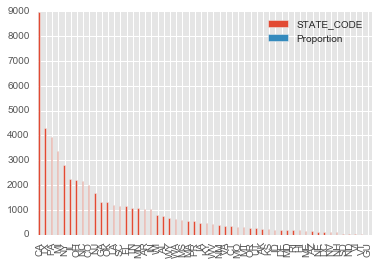

In [74]:
count_per_group_viol.plot(kind='bar')

In [194]:
#df_violations_frv = df_violations.dropna(subset=['EARLIEST_FRV_DETERM_DATE']).drop(['HPV_DAYZERO_DATE','HPV_RESOLVED_DATE'], axis=1)
#df_violations_hpv = df_violations.dropna(subset=['HPV_DAYZERO_DATE','HPV_RESOLVED_DATE']).drop('EARLIEST_FRV_DETERM_DATE',axis=1)

#date_types = ['year','month']
#date_format ='%m-%d-%Y'
#frv_atts = ['EARLIEST_FRV_DETERM_DATE']
#get_occupied_frame(df_violations_frv, frv_atts ,date_format, date_types)

#hpv_atts = ['HPV_DAYZERO_DATE','HPV_RESOLVED_DATE']
#get_occupied_frame(df_violations_hpv, hpv_atts,date_format, date_types)

['year', 'month']
['year', 'month']


In [258]:
#interest_var = ['PGM_SYS_ID','ACTIVITY_ID','AGENCY_TYPE_DESC','STATE_CODE','AIR_LCON_CODE','COMP_DETERMINATION_UID','ENF_RESPONSE_POLICY_CODE','PROGRAM_CODES']
date_types = ['year','month']
date_format ='%m-%d-%Y'
interest_vars = ['HPV_DAYZERO_DATE','HPV_RESOLVED_DATE','EARLIEST_FRV_DETERM_DATE']
date_col = ['HPV_DAYZERO_DATE','HPV_RESOLVED_DATE','EARLIEST_FRV_DETERM_DATE']
get_occupied_frame(df_violations, interest_vars ,date_format, date_types)
hpv_correct = df_violations.HPV_DAYZERO_DATE_year > '2006'
frv_correct = df_violations.EARLIEST_FRV_DETERM_DATE_year >'2006'
df_violations = df_violations[hpv_correct | frv_correct]

['year', 'month']


In [196]:
#df_violations_frv = df_violations_frv[df_violations_frv.EARLIEST_FRV_DETERM_DATE_year > '2006']

In [266]:
df_violations_hpv = df_violations[df_violations.ENF_RESPONSE_POLICY_CODE == 'HPV']

In [199]:
def day_to_int(series_row):
    return int(str(series_row).split()[0])

In [273]:
# DAYS TO RESOLVE 

df_violations_hpv = df_violations.dropna(subset=['HPV_RESOLVED_DATE_datetime','HPV_DAYZERO_DATE_datetime'])
df_violations_hpv['DAYS_TO_RESOLVE'] = pd.to_datetime(df_violations_hpv['HPV_RESOLVED_DATE_datetime']).sub(pd.to_datetime(df_violations_hpv['HPV_DAYZERO_DATE_datetime']))
df_violations_hpv['DAYS_TO_RESOLVE_INT'] = df_violations_hpv.DAYS_TO_RESOLVE.apply(day_to_int)

/Users/andrewyaspan/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/andrewyaspan/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [285]:
#df_violations_hpv.head()
df_hpv_daystoResolve = df_violations_hpv[['DAYS_TO_RESOLVE','DAYS_TO_RESOLVE_INT']]

In [264]:
print('total_count_dayzero: ',len(df_violations.HPV_DAYZERO_DATE.dropna()),' total_count_resolved: ',len(df_violations.HPV_RESOLVED_DATE.dropna()))

total_count_dayzero:  35469  total_count_resolved:  41728


In [314]:
df_hpv_daystoResolve.head(2)

,DAYS_TO_RESOLVE,DAYS_TO_RESOLVE_INT
5,230 days,230
6,778 days,778


In [101]:
df_violations_hpv.head(1)

,PGM_SYS_ID,ACTIVITY_ID,AGENCY_TYPE_DESC,STATE_CODE,AIR_LCON_CODE,COMP_DETERMINATION_UID,ENF_RESPONSE_POLICY_CODE,PROGRAM_CODES,PROGRAM_DESCS,POLLUTANT_CODES,POLLUTANT_DESCS,HPV_DAYZERO_DATE,HPV_RESOLVED_DATE,EARLIEST_FRV_DETERM_DATE_datetime,EARLIEST_FRV_DETERM_DATE_year,HPV_DAYZERO_DATE_datetime,HPV_DAYZERO_DATE_year,HPV_DAYZERO_DATE_month_name,HPV_DAYZERO_DATE_month_num,HPV_RESOLVED_DATE_datetime,HPV_RESOLVED_DATE_year,HPV_RESOLVED_DATE_month_name,HPV_RESOLVED_DATE_month_num
0,CT0000000900700108,3400302038,State,CT,NaN,CT000A0000090070010800028,HPV,CAASIP,State Implementation Plan for National Primary...,300000005 300000323,NITROGEN OXIDES NO2 POLLUTANT X,05-28-1996,10-15-1996,NaN,NaN,1996-05-28,1996,May,05,1996-10-15,1996,October,10


In [316]:
df_violations.groupby(['PGM_SYS_ID','HPV_DAYZERO_DATE_year'],as_index = True,group_keys = True).size().to_frame().reset_index().head()

,PGM_SYS_ID,HPV_DAYZERO_DATE_year,0
0,0500000026055R0002,2014,1
1,0500000026061R0001,2013,1
2,0500000039067R0001,2012,1
3,0500000055079R0018,2008,1
4,0500018017R5001,2015,1


/Users/andrewyaspan/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


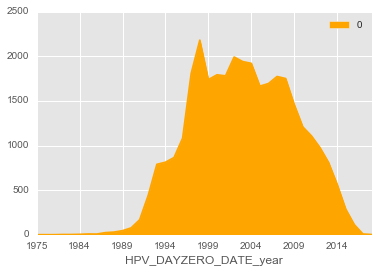

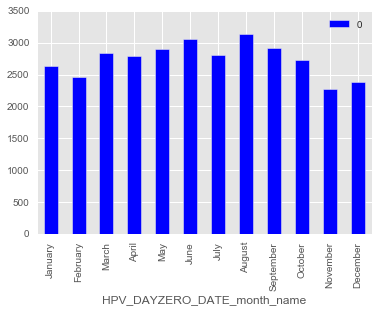

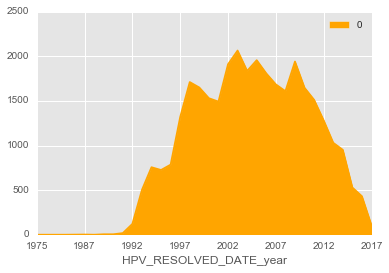

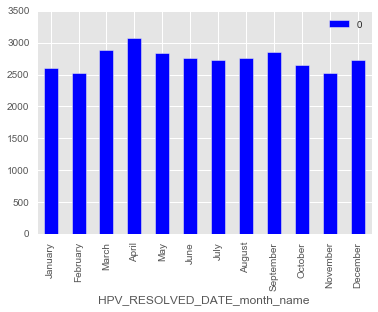

In [119]:
create_date_charts(df_violations_hpv, date_types, hpv_atts)

/Users/andrewyaspan/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


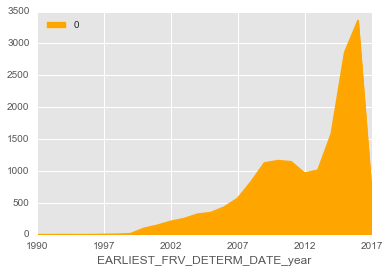

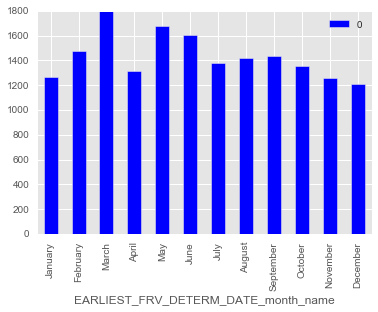

In [178]:
create_date_charts(df_violations_frv, date_types, frv_atts)

In [307]:
df_violations_hpv_dummies = pd.get_dummies(df_violations.HPV_DAYZERO_DATE_year, prefix = 'HPV_')
df_violations_frv_dummies = pd.get_dummies(df_violations.EARLIEST_FRV_DETERM_DATE_year, prefix = 'FRV_')

In [310]:
df_violations = df_violations.join(df_violations_hpv_dummies)
df_violations = df_violations.join(df_violations_frv_dummies)

In [315]:
df_violations = df_violations.join(df_hpv_daystoResolve)
df_violations_all_save = df_violations.copy()

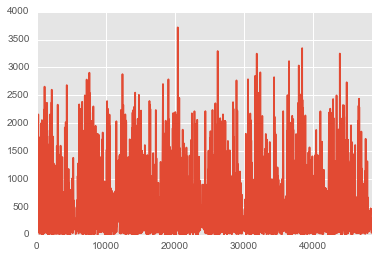

In [420]:
#DROP violations resolved in the past
df_violations_hpv.drop(df_violations_hpv[df_violations_hpv.DAYS_TO_RESOLVE_INT < 0].index)

In [209]:
emissions = read_file('data/POLL_RPT_COMBINED_EMISSIONS.csv')

/Users/andrewyaspan/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2821: DtypeWarning: Columns (3,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [271]:
emissions.head()

,REPORTING_YEAR,REGISTRY_ID,PGM_SYS_ACRNM,PGM_SYS_ID,POLLUTANT_NAME,ANNUAL_EMISSION,UNIT_OF_MEASURE,NEI_TYPE,NEI_HAP_VOC_FLAG
0,2006,110002481430,TRIS,06095TRBTC651DA,Copper,63.30,Pounds,NaN,NaN
1,2006,110000410975,TRIS,49443SNCHM4925E,Barium compounds -- TRI,0.00,Pounds,NaN,NaN
2,2006,110000410975,TRIS,49443SNCHM4925E,Lead compounds,0.12,Pounds,NaN,NaN
3,2006,110000410975,TRIS,49443SNCHM4925E,Mercury,0.01,Pounds,NaN,NaN
4,2006,110000416540,TRIS,53051RBCRPN92W1,Toluene,1164.00,Pounds,NaN,NaN


In [273]:
cross_vectors(emissions, 'POLLUTANT_NAME', 'ANNUAL_EMISSION')


ANNUAL_EMISSION,-12989.16,-9918.0,-1362.25,0.0,1.53e-19,4.46e-19,5.29e-19,5.35e-19,5.71e-19,6.67e-19,...,47717646000.0,47838144000.0,48267882000.0,48275542000.0,48762720000.0,49789704000.0,50266808000.0,50596998000.0,53087208000.0,54462174000.0
POLLUTANT_NAME,,,,,,,,,,,,,,,,,,,,,
.alpha.-Hexachlorocyclohexane,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"1,1,1,2-Tetrachloroethane",0,0,0,22,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"1,1,1-Trichloroethane",0,0,0,669,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"1,1,2,2-Tetrachloroethane",0,0,0,253,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"1,1,2-Trichloroethane",0,0,0,170,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"1,1-Dichloroethane",0,0,0,162,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"1,1-Dichloroethylene",0,0,0,68,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"1,1-Dimethylhydrazine",0,0,0,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"1,2,3,4,5,6-Hexachlorocyclohexane",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [279]:
emissions[['POLLUTANT_NAME','ANNUAL_EMISSION']].groupby('POLLUTANT_NAME').mean()

,ANNUAL_EMISSION
POLLUTANT_NAME,
.alpha.-Hexachlorocyclohexane,11.000000
"1,1,1,2-Tetrachloroethane",304.933233
"1,1,1-Trichloroethane",776.529731
"1,1,2,2-Tetrachloroethane",35.522883
"1,1,2-Trichloroethane",94.594339
"1,1-Dichloroethane",64.770820
"1,1-Dichloroethylene",59.344925
"1,1-Dimethylhydrazine",48.953552
"1,2,3,4,5,6-Hexachlorocyclohexane",4.456438


In [490]:
facilities = read_file('data/ICIS-AIR_downloads/ICIS-AIR_FACILITIES.csv')

In [247]:
facilities.columns


Index(['PGM_SYS_ID', 'REGISTRY_ID', 'FACILITY_NAME', 'STREET_ADDRESS', 'CITY',
       'COUNTY_NAME', 'STATE', 'ZIP_CODE', 'EPA_REGION', 'SIC_CODES',
       'NAICS_CODES', 'FACILITY_TYPE_CODE', 'AIR_POLLUTANT_CLASS_CODE',
       'AIR_POLLUTANT_CLASS_DESC', 'AIR_OPERATING_STATUS_CODE',
       'AIR_OPERATING_STATUS_DESC', 'CURRENT_HPV', 'LOCAL_CONTROL_REGION_CODE',
       'LOCAL_CONTROL_REGION_NAME'],
      dtype='object')

In [249]:
afs_facilities.columns

Index(['PLANT_ID', 'AFS_ID', 'PLANT_NAME', 'EPA_REGION',
       'PLANT_STREET_ADDRESS', 'PLANT_CITY', 'PLANT_COUNTY', 'STATE',
       'STATE_NUMBER', 'ZIP_CODE', 'PRIMARY_SIC_CODE', 'SECONDARY_SIC_CODE',
       'NAICS_CODE', 'AFS_GOV_FACILITY_CODE', 'FEDERALLY_REPORTABLE',
       'EPA_CLASSIFICATION_CODE', 'OPERATING_STATUS', 'EPA_COMPLIANCE_STATUS',
       'CURRENT_HPV', 'LOCAL_CONTROL_REGION', 'STATE_COMPLIANCE_STATUS'],
      dtype='object')

In [232]:
afs_facilities = read_file('data/afs_downloads/AFS_FACILITIES.csv')

/Users/andrewyaspan/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2821: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [533]:
afs_facilities = read_file('data/afs_downloads/AFS_FACILITIES.csv')

/Users/andrewyaspan/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2821: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [259]:
afs_facilities.columns

Index(['AFS_ID', 'AIR_PROGRAM_CODE', 'HISTORICAL_COMPLIANCE_DATE',
       'HISTORICAL_COMPLIANCE_STATUS'],
      dtype='object')

In [522]:
pollutants = read_file('data/ICIS-AIR_downloads/ICIS-AIR_POLLUTANTS.csv')

/Users/andrewyaspan/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2821: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [251]:
pollutants.columns

Index(['PGM_SYS_ID', 'POLLUTANT_CODE', 'POLLUTANT_DESC', 'SRS_ID',
       'CHEMICAL_ABSTRACT_SERVICE_NMBR', 'AIR_POLLUTANT_CLASS_CODE',
       'AIR_POLLUTANT_CLASS_DESC'],
      dtype='object')

In [216]:
formal_actions = read_file('data/ICIS-AIR_downloads/ICIS-AIR_FORMAL_ACTIONS.csv')

In [252]:
formal_actions.columns

Index(['PGM_SYS_ID', 'ACTIVITY_ID', 'ENF_IDENTIFIER', 'ACTIVITY_TYPE_CODE',
       'ACTIVITY_TYPE_DESC', 'STATE_EPA_FLAG', 'ENF_TYPE_CODE',
       'ENF_TYPE_DESC', 'SETTLEMENT_ENTERED_DATE', 'PENALTY_AMOUNT'],
      dtype='object')

In [431]:
## Can standardized violation informaton and concatonate violation dataFrames


In [2]:
df_programs = read_file('data/ICIS-AIR_downloads/ICIS-AIR_PROGRAMS.csv') 

In [5]:
df_programs.head()

,PGM_SYS_ID,PROGRAM_CODE,PROGRAM_DESC,AIR_OPERATING_STATUS_CODE,AIR_OPERATING_STATUS_DESC
0,NH0000003300190201,CAASIP,State Implementation Plan for National Primary...,OPR,Operating
1,NH0000003300700012,CAASIP,State Implementation Plan for National Primary...,OPR,Operating
2,NH0000003300700013,CAASIP,State Implementation Plan for National Primary...,CLS,Permanently Closed
3,NH0000003300700013,CAANSPS,New Source Performance Standards,CLS,Permanently Closed
4,NH0000003300100001,CAAGACTM,40 CFR Part 63 Area Sources,OPR,Operating


In [204]:
titlev_certs = read_file('data/ICIS-AIR_downloads/ICIS-AIR_TITLEV_CERTS.csv')

In [240]:
titlev_certs.head()

,PGM_SYS_ID,ACTIVITY_ID,COMP_MONITOR_TYPE_CODE,COMP_MONITOR_TYPE_DESC,STATE_EPA_FLAG,ACTUAL_END_DATE,FACILITY_RPT_DEVIATION_FLAG,ACTUAL_END_DATE_datetime,ACTUAL_END_DATE_year,ACTUAL_END_DATE_month_name,ACTUAL_END_DATE_month_num
0,UT0000004903500210,3600154556,TVA,TV ACC Receipt/Review,S,04/30/2015,Y,2015-04-30 00:00:00,2015,April,04
1,UT0000004903500210,3600154556,TVA,TV ACC Receipt/Review,S,04/30/2015,Y,2015-04-30 00:00:00,2015,April,04
2,UT0000004903500210,3600154556,TVA,TV ACC Receipt/Review,S,04/30/2015,Y,2015-04-30 00:00:00,2015,April,04
3,UT0000004903500210,3600154556,TVA,TV ACC Receipt/Review,S,04/30/2015,Y,2015-04-30 00:00:00,2015,April,04
4,UT0000004903500210,3600154556,TVA,TV ACC Receipt/Review,S,04/30/2015,Y,2015-04-30 00:00:00,2015,April,04


In [206]:
date_format ='%m/%d/%Y'
date_attributes = ['ACTUAL_END_DATE']
date_types = ['year','month']
get_occupied_frame(titlev_certs,date_attributes,date_format, date_types)

['year', 'month']


In [126]:
titlev_certs.FACILITY_RPT_DEVIATION_FLAG.value_counts()

N    421625
Y    212205
Name: FACILITY_RPT_DEVIATION_FLAG, dtype: int64

In [402]:
#invalid dates
titlev_certs = titlev_certs[titlev_certs.ACTUAL_END_DATE_year > '2006']

In [408]:
titlev_certs_yrs = pd.get_dummies(titlev_certs.ACTUAL_END_DATE_year)

In [403]:
titlev_certs_flag = titlev_certs[titlev_certs.FACILITY_RPT_DEVIATION_FLAG == 'Y']
titlev_certs_no_flag = titlev_certs[titlev_certs.FACILITY_RPT_DEVIATION_FLAG == 'N']

In [404]:
titlev_certs_flag_yrs = pd.get_dummies(titlev_certs_flag.ACTUAL_END_DATE_year)
titlev_certs_no_flag_yrs = pd.get_dummies(titlev_certs_no_flag.ACTUAL_END_DATE_year)

In [405]:
titlev_certs.head(1)

,PGM_SYS_ID,ACTIVITY_ID,COMP_MONITOR_TYPE_CODE,COMP_MONITOR_TYPE_DESC,STATE_EPA_FLAG,ACTUAL_END_DATE,FACILITY_RPT_DEVIATION_FLAG,ACTUAL_END_DATE_datetime,ACTUAL_END_DATE_year,ACTUAL_END_DATE_month_name,ACTUAL_END_DATE_month_num
0,UT0000004903500210,3600154556,TVA,TV ACC Receipt/Review,S,04/30/2015,Y,2015-04-30 00:00:00,2015,April,04


/Users/andrewyaspan/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


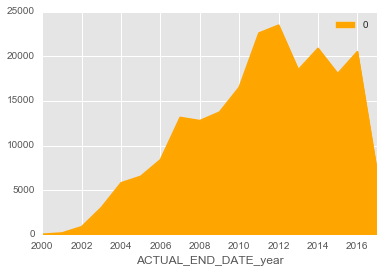

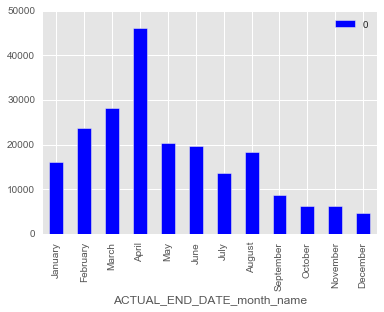

In [245]:
actual_date = ['ACTUAL_END_DATE']
create_date_charts(titlev_certs_flag, date_types, actual_date)

/Users/andrewyaspan/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


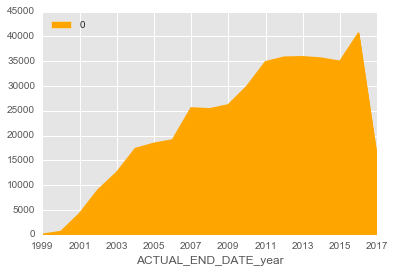

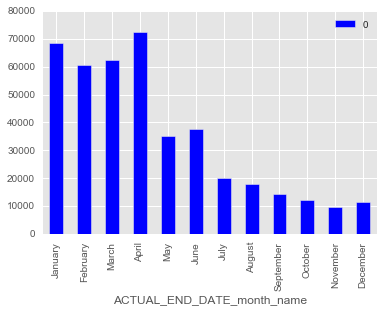

In [246]:
create_date_charts(titlev_certs_no_flag, date_types, actual_date)

In [201]:
df_violations_hpv = df_violations_hpv.join(hpv_years)

In [202]:
df_violations_frv = df_violations_frv.join(frv_years)

In [164]:
df_violations_hpv.head()

,PGM_SYS_ID,ACTIVITY_ID,AGENCY_TYPE_DESC,STATE_CODE,AIR_LCON_CODE,COMP_DETERMINATION_UID,ENF_RESPONSE_POLICY_CODE,PROGRAM_CODES,PROGRAM_DESCS,POLLUTANT_CODES,POLLUTANT_DESCS,HPV_DAYZERO_DATE,HPV_RESOLVED_DATE,EARLIEST_FRV_DETERM_DATE_datetime,EARLIEST_FRV_DETERM_DATE_year,HPV_DAYZERO_DATE_datetime,HPV_DAYZERO_DATE_year,HPV_DAYZERO_DATE_month_name,HPV_DAYZERO_DATE_month_num,HPV_RESOLVED_DATE_datetime,HPV_RESOLVED_DATE_year,HPV_RESOLVED_DATE_month_name,HPV_RESOLVED_DATE_month_num,HPV__1975,HPV__1976,HPV__1978,HPV__1982,HPV__1983,HPV__1984,HPV__1985,HPV__1986,HPV__1987,HPV__1988,HPV__1989,HPV__1990,HPV__1991,HPV__1992,HPV__1993,HPV__1994,HPV__1995,HPV__1996,HPV__1997,HPV__1998,HPV__1999,HPV__2000,HPV__2001,HPV__2002,HPV__2003,HPV__2004,HPV__2005,HPV__2006,HPV__2007,HPV__2008,HPV__2009,HPV__2010,HPV__2011,HPV__2012,HPV__2013,HPV__2014,HPV__2015,HPV__2016,HPV__2017,HPV__2020
0,CT0000000900700108,3400302038,State,CT,NaN,CT000A0000090070010800028,HPV,CAASIP,State Implementation Plan for National Primary...,300000005 300000323,NITROGEN OXIDES NO2 POLLUTANT X,05-28-1996,10-15-1996,NaN,NaN,1996-05-28,1996,May,05,1996-10-15,1996,October,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,CT0000000900900110,3400302044,State,CT,NaN,CT000A0000090090011000026,HPV,CAASIP,State Implementation Plan for National Primary...,300000005 300000323,NITROGEN OXIDES NO2 POLLUTANT X,05-28-1996,10-15-1996,NaN,NaN,1996-05-28,1996,May,05,1996-10-15,1996,October,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,CT0000000900900110,3400302045,State,CT,NaN,CT000A0000090090011000037,HPV,CAASIP,State Implementation Plan for National Primary...,10461 300000005,NITROGEN OXIDES NO2 Sulfur dioxide,08-21-1998,09-30-1999,NaN,NaN,1998-08-21,1998,August,08,1999-09-30,1999,September,09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CT0000000900300125,3400302055,State,CT,NaN,CT000A0000090030012500017,HPV,CAASIP,State Implementation Plan for National Primary...,300000242 300000329,FACIL TOTAL HAZARDOUS AIR POLLUTANTS (HAPS),07-12-2005,07-17-2007,NaN,NaN,2005-07-12,2005,July,07,2007-07-17,2007,July,07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,CT0000000900508907,3400302093,State,CT,NaN,CT000A0000090050890700012,HPV,CAAFESOP,Federally-Enforceable State Operating Permit -...,300000329,FACIL,03-17-2010,11-02-2010,NaN,NaN,2010-03-17,2010,March,03,2010-11-02,2010,November,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [406]:
titlev_certs_flag = titlev_certs_flag.join(title_certs_flag_yrs)

titlev_certs_no_flag = titlev_certs_no_flag.join(titlev_certs_no_flag_yrs)


In [234]:
#create dummies for program codes, drop pollutant codes and descriptions
%run processing.py

In [320]:
program_pattern = r'([^\s][A-Z]*)'
sep = lambda x: pd.Series([i for i in re.findall(program_pattern,x)])
df_violations_program_codes = df_violations.PROGRAM_CODES.apply(sep)

In [324]:
df_violations_program_codes.head()

,0,1,2,3,4,5,6
1,CAATVP,NaN,NaN,NaN,NaN,NaN,NaN
5,CAAFESOP,NaN,NaN,NaN,NaN,NaN,NaN
6,CAAFESOP,NaN,NaN,NaN,NaN,NaN,NaN
7,CAATVP,NaN,NaN,NaN,NaN,NaN,NaN
9,CAAFESOP,NaN,NaN,NaN,NaN,NaN,NaN


In [395]:
violation_years_and_program_codes = df_violations[['PGM_SYS_ID','PROGRAM_CODES']].join(pd.get_dummies(pd.concat([df_violations_program_codes[0],df_violations_program_codes[1],df_violations_program_codes[2],df_violations_program_codes[3],df_violations_program_codes[4],df_violations_program_codes[5],df_violations_program_codes[6]]).dropna().to_frame(),prefix='CODE_'))

In [396]:
violation_years_and_program_codes.head()

,PGM_SYS_ID,PROGRAM_CODES,CODE__CAAAR,CODE__CAACFC,CODE__CAAEP,CODE__CAAFESOP,CODE__CAAFIP,CODE__CAAGACTM,CODE__CAAGHG,CODE__CAAMACT,CODE__CAANAM,CODE__CAANESH,CODE__CAANFRP,CODE__CAANSP,CODE__CAANSPS,CODE__CAANSPSM,CODE__CAANSR,CODE__CAAOP,CODE__CAAOTH,CODE__CAAPARGDC,CODE__CAAPSD,CODE__CAAPSDPR,CODE__CAASIP,CODE__CAASPP,CODE__CAATVP
1,CT0000000900700108,CAATVP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,CT0000000900508907,CAAFESOP,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,CT0000000900100078,CAAFESOP,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,CT0000000901501125,CAATVP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,CT0000000900109058,CAAFESOP,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [373]:
aggregate_year_violations = df_violations.groupby(["PGM_SYS_ID","PROGRAM_CODES"]).sum().reset_index()

In [422]:
df_violations[df_violations.HPV_DAYZERO_DATE_year > 123124 and  <123124].groupby().sum()

,PGM_SYS_ID,ACTIVITY_ID,AGENCY_TYPE_DESC,STATE_CODE,AIR_LCON_CODE,COMP_DETERMINATION_UID,ENF_RESPONSE_POLICY_CODE,PROGRAM_CODES,PROGRAM_DESCS,POLLUTANT_CODES,POLLUTANT_DESCS,EARLIEST_FRV_DETERM_DATE,HPV_DAYZERO_DATE,HPV_RESOLVED_DATE,HPV_DAYZERO_DATE_datetime,HPV_DAYZERO_DATE_year,HPV_DAYZERO_DATE_month_name,HPV_DAYZERO_DATE_month_num,HPV_RESOLVED_DATE_datetime,HPV_RESOLVED_DATE_year,HPV_RESOLVED_DATE_month_name,HPV_RESOLVED_DATE_month_num,EARLIEST_FRV_DETERM_DATE_datetime,EARLIEST_FRV_DETERM_DATE_year,EARLIEST_FRV_DETERM_DATE_month_name,EARLIEST_FRV_DETERM_DATE_month_num,HPV__2007,HPV__2008,HPV__2009,HPV__2010,HPV__2011,HPV__2012,HPV__2013,HPV__2014,HPV__2015,HPV__2016,HPV__2017,HPV__2020,FRV__0014,FRV__2007,FRV__2008,FRV__2009,FRV__2010,FRV__2011,FRV__2012,FRV__2013,FRV__2014,FRV__2015,FRV__2016,FRV__2017,DAYS_TO_RESOLVE,DAYS_TO_RESOLVE_INT
1,CT0000000900700108,3400302043,State,CT,NaN,CT000A0000090070010800158,FRV,CAATVP,Title V Permits,300000282,NITROGEN OXIDES,05-24-2013,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-05-24 00:00:00,2013,May,05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaT,NaN
5,CT0000000900508907,3400302093,State,CT,NaN,CT000A0000090050890700012,HPV,CAAFESOP,Federally-Enforceable State Operating Permit -...,300000329,FACIL,NaN,03-17-2010,11-02-2010,2010-03-17,2010,March,03,2010-11-02 00:00:00,2010,November,11,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,230 days,230.0
6,CT0000000900100078,3400302098,State,CT,NaN,CT000A0000090010007800021,HPV,CAAFESOP,Federally-Enforceable State Operating Permit -...,300000329,FACIL,NaN,08-08-2007,09-24-2009,2007-08-08,2007,August,08,2009-09-24 00:00:00,2009,September,09,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,778 days,778.0
7,CT0000000901501125,3400302109,State,CT,NaN,CT000A0000090150112500209,HPV,CAATVP,Title V Permits,10193,Carbon monoxide,NaN,04-26-2013,06-25-2014,2013-04-26,2013,April,04,2014-06-25 00:00:00,2014,June,06,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,425 days,425.0
9,CT0000000900109058,3400302112,State,CT,NaN,CT000A0000090010905800007,HPV,CAAFESOP,Federally-Enforceable State Operating Permit -...,300000005,NITROGEN OXIDES NO2,NaN,01-17-2008,01-06-2009,2008-01-17,2008,January,01,2009-01-06 00:00:00,2009,January,01,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,355 days,355.0


In [ ]:
#NEED TO JOIN ALL OF THESE
    #AGREGATE COUNTS FOR YEARS, DAYS TO RESOLVE?, CODES

In [411]:
icis_facilities.columns

Index(['ICIS_FACILITY_INTEREST_ID', 'NPDES_ID', 'FACILITY_UIN',
       'FACILITY_TYPE_CODE', 'FACILITY_NAME', 'LOCATION_ADDRESS',
       'SUPPLEMENTAL_ADDRESS_TEXT', 'CITY', 'COUNTY_CODE', 'STATE_CODE', 'ZIP',
       'GEOCODE_LATITUDE', 'GEOCODE_LONGITUDE', 'IMPAIRED_WATERS'],
      dtype='object')

In [414]:
df_fces_pces = read_file('data/ICIS-AIR_downloads/ICIS-AIR_FCES_PCES.csv')

In [415]:
df_fces_pces.columns

Index(['PGM_SYS_ID', 'ACTIVITY_ID', 'STATE_EPA_FLAG', 'ACTIVITY_TYPE_CODE',
       'ACTIVITY_TYPE_DESC', 'COMP_MONITOR_TYPE_CODE',
       'COMP_MONITOR_TYPE_DESC', 'ACTUAL_END_DATE', 'PROGRAM_CODES'],
      dtype='object')

In [416]:
df_fces_pces.head()

,PGM_SYS_ID,ACTIVITY_ID,STATE_EPA_FLAG,ACTIVITY_TYPE_CODE,ACTIVITY_TYPE_DESC,COMP_MONITOR_TYPE_CODE,COMP_MONITOR_TYPE_DESC,ACTUAL_END_DATE,PROGRAM_CODES
0,MI00000000000A1932,3600154506,E,INS,Inspection/Evaluation,PCE,PCE On-Site,06-09-2015,"CAAFESOP, CAASIP"
1,CASJV00006029S2076,3600154515,L,INS,Inspection/Evaluation,FOO,FCE On-Site,06-10-2015,CAATVP
2,CASJV00006039C2587,3600154514,L,INS,Inspection/Evaluation,FOO,FCE On-Site,06-08-2015,CAASIP
3,CASJV00006029S1234,3600154512,L,INS,Inspection/Evaluation,FOO,FCE On-Site,06-10-2015,CAATVP
4,CASJV00006099N7478,3600154520,L,INS,Inspection/Evaluation,FOO,FCE On-Site,06-11-2015,CAATVP


In [423]:
df_violations.columns

Index(['PGM_SYS_ID', 'ACTIVITY_ID', 'AGENCY_TYPE_DESC', 'STATE_CODE',
       'AIR_LCON_CODE', 'COMP_DETERMINATION_UID', 'ENF_RESPONSE_POLICY_CODE',
       'PROGRAM_CODES', 'PROGRAM_DESCS', 'POLLUTANT_CODES', 'POLLUTANT_DESCS',
       'EARLIEST_FRV_DETERM_DATE', 'HPV_DAYZERO_DATE', 'HPV_RESOLVED_DATE',
       'HPV_DAYZERO_DATE_datetime', 'HPV_DAYZERO_DATE_year',
       'HPV_DAYZERO_DATE_month_name', 'HPV_DAYZERO_DATE_month_num',
       'HPV_RESOLVED_DATE_datetime', 'HPV_RESOLVED_DATE_year',
       'HPV_RESOLVED_DATE_month_name', 'HPV_RESOLVED_DATE_month_num',
       'EARLIEST_FRV_DETERM_DATE_datetime', 'EARLIEST_FRV_DETERM_DATE_year',
       'EARLIEST_FRV_DETERM_DATE_month_name',
       'EARLIEST_FRV_DETERM_DATE_month_num', 'HPV__2007', 'HPV__2008',
       'HPV__2009', 'HPV__2010', 'HPV__2011', 'HPV__2012', 'HPV__2013',
       'HPV__2014', 'HPV__2015', 'HPV__2016', 'HPV__2017', 'HPV__2020',
       'FRV__0014', 'FRV__2007', 'FRV__2008', 'FRV__2009', 'FRV__2010',
       'FRV__2011', 'FRV_

In [428]:
df_formal = read_file('data/ICIS-AIR_downloads/ICIS-AIR_FORMAL_ACTIONS.csv')

In [440]:
df_violations.head()

,PGM_SYS_ID,ACTIVITY_ID,AGENCY_TYPE_DESC,STATE_CODE,AIR_LCON_CODE,COMP_DETERMINATION_UID,ENF_RESPONSE_POLICY_CODE,PROGRAM_CODES,PROGRAM_DESCS,POLLUTANT_CODES,POLLUTANT_DESCS,EARLIEST_FRV_DETERM_DATE,HPV_DAYZERO_DATE,HPV_RESOLVED_DATE,HPV_DAYZERO_DATE_datetime,HPV_DAYZERO_DATE_year,HPV_DAYZERO_DATE_month_name,HPV_DAYZERO_DATE_month_num,HPV_RESOLVED_DATE_datetime,HPV_RESOLVED_DATE_year,HPV_RESOLVED_DATE_month_name,HPV_RESOLVED_DATE_month_num,EARLIEST_FRV_DETERM_DATE_datetime,EARLIEST_FRV_DETERM_DATE_year,EARLIEST_FRV_DETERM_DATE_month_name,EARLIEST_FRV_DETERM_DATE_month_num,HPV__2007,HPV__2008,HPV__2009,HPV__2010,HPV__2011,HPV__2012,HPV__2013,HPV__2014,HPV__2015,HPV__2016,HPV__2017,HPV__2020,FRV__0014,FRV__2007,FRV__2008,FRV__2009,FRV__2010,FRV__2011,FRV__2012,FRV__2013,FRV__2014,FRV__2015,FRV__2016,FRV__2017,DAYS_TO_RESOLVE,DAYS_TO_RESOLVE_INT
1,CT0000000900700108,3400302043,State,CT,NaN,CT000A0000090070010800158,FRV,CAATVP,Title V Permits,300000282,NITROGEN OXIDES,05-24-2013,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-05-24 00:00:00,2013,May,05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaT,NaN
5,CT0000000900508907,3400302093,State,CT,NaN,CT000A0000090050890700012,HPV,CAAFESOP,Federally-Enforceable State Operating Permit -...,300000329,FACIL,NaN,03-17-2010,11-02-2010,2010-03-17,2010,March,03,2010-11-02 00:00:00,2010,November,11,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,230 days,230.0
6,CT0000000900100078,3400302098,State,CT,NaN,CT000A0000090010007800021,HPV,CAAFESOP,Federally-Enforceable State Operating Permit -...,300000329,FACIL,NaN,08-08-2007,09-24-2009,2007-08-08,2007,August,08,2009-09-24 00:00:00,2009,September,09,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,778 days,778.0
7,CT0000000901501125,3400302109,State,CT,NaN,CT000A0000090150112500209,HPV,CAATVP,Title V Permits,10193,Carbon monoxide,NaN,04-26-2013,06-25-2014,2013-04-26,2013,April,04,2014-06-25 00:00:00,2014,June,06,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,425 days,425.0
9,CT0000000900109058,3400302112,State,CT,NaN,CT000A0000090010905800007,HPV,CAAFESOP,Federally-Enforceable State Operating Permit -...,300000005,NITROGEN OXIDES NO2,NaN,01-17-2008,01-06-2009,2008-01-17,2008,January,01,2009-01-06 00:00:00,2009,January,01,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,355 days,355.0


In [466]:
df_fces_pces.count()

PGM_SYS_ID                1372952
ACTIVITY_ID               1372952
STATE_EPA_FLAG            1372952
ACTIVITY_TYPE_CODE        1372952
ACTIVITY_TYPE_DESC        1372952
COMP_MONITOR_TYPE_CODE    1372952
COMP_MONITOR_TYPE_DESC    1372952
ACTUAL_END_DATE           1372952
PROGRAM_CODES             1372951
dtype: int64

In [464]:
df_insp_w_violations = pd.merge(df_violations[df_violations.EARLIEST_FRV_DETERM_DATE.isnull()], df_fces_pces, how='right', left_on=['PGM_SYS_ID','HPV_DAYZERO_DATE'], right_on=['PGM_SYS_ID','ACTUAL_END_DATE'])

In [494]:
df1 = df_violations[df_violations.PGM_SYS_ID == 'CASJV00006029S0037']
df1.head()

,PGM_SYS_ID,ACTIVITY_ID,AGENCY_TYPE_DESC,STATE_CODE,AIR_LCON_CODE,COMP_DETERMINATION_UID,ENF_RESPONSE_POLICY_CODE,PROGRAM_CODES,PROGRAM_DESCS,POLLUTANT_CODES,POLLUTANT_DESCS,EARLIEST_FRV_DETERM_DATE,HPV_DAYZERO_DATE,HPV_RESOLVED_DATE,HPV_DAYZERO_DATE_datetime,HPV_DAYZERO_DATE_year,HPV_DAYZERO_DATE_month_name,HPV_DAYZERO_DATE_month_num,HPV_RESOLVED_DATE_datetime,HPV_RESOLVED_DATE_year,HPV_RESOLVED_DATE_month_name,HPV_RESOLVED_DATE_month_num,EARLIEST_FRV_DETERM_DATE_datetime,EARLIEST_FRV_DETERM_DATE_year,EARLIEST_FRV_DETERM_DATE_month_name,EARLIEST_FRV_DETERM_DATE_month_num,HPV__2007,HPV__2008,HPV__2009,HPV__2010,HPV__2011,HPV__2012,HPV__2013,HPV__2014,HPV__2015,HPV__2016,HPV__2017,HPV__2020,FRV__0014,FRV__2007,FRV__2008,FRV__2009,FRV__2010,FRV__2011,FRV__2012,FRV__2013,FRV__2014,FRV__2015,FRV__2016,FRV__2017,DAYS_TO_RESOLVE,DAYS_TO_RESOLVE_INT
3793,CASJV00006029S0037,3400411357,Local,CA,SJV,CASJVA000006029S003700797,HPV,CAATVP,Title V Permits,300000329,FACIL,NaN,07-15-2008,04-13-2009,2008-07-15,2008,July,07,2009-04-13 00:00:00,2009,April,04,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,272 days,272.0
3807,CASJV00006029S0037,3400411422,Local,CA,SJV,CASJVA000006029S003700883,HPV,CAATVP,Title V Permits,300000329,FACIL,NaN,01-06-2009,01-12-2011,2009-01-06,2009,January,01,2011-01-12 00:00:00,2011,January,01,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,736 days,736.0
4590,CASJV00006029S0037,3600195961,Local,CA,SJV,CASJVA2000000000000001040,HPV,CAATVP,Title V Permits,300000329,FACIL,03-30-2010,03-30-2010,03-18-2011,2010-03-30,2010,March,03,2011-03-18 00:00:00,2011,March,03,2010-03-30 00:00:00,2010,March,03,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,353 days,353.0
4684,CASJV00006029S0037,3600180905,Local,CA,SJV,CASJVA2000000000000000842,HPV,CAATVP,Title V Permits,300000329,FACIL,08-15-2011,08-15-2011,10-26-2011,2011-08-15,2011,August,08,2011-10-26 00:00:00,2011,October,10,2011-08-15 00:00:00,2011,August,08,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,72 days,72.0
4701,CASJV00006029S0037,3600133161,Local,CA,SJV,CASJVA2000000000000000326,HPV,CAATVP,Title V Permits,300000329,FACIL,01-31-2014,01-31-2014,07-15-2015,2014-01-31,2014,January,01,2015-07-15 00:00:00,2015,July,07,2014-01-31 00:00:00,2014,January,01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,530 days,530.0


In [495]:
df2 = df_fces_pces[df_fces_pces.PGM_SYS_ID == 'CASJV00006029S0037']
df2.head()

,PGM_SYS_ID,ACTIVITY_ID,STATE_EPA_FLAG,ACTIVITY_TYPE_CODE,ACTIVITY_TYPE_DESC,COMP_MONITOR_TYPE_CODE,COMP_MONITOR_TYPE_DESC,ACTUAL_END_DATE,PROGRAM_CODES
129227,CASJV00006029S0037,3402470633,L,INS,Inspection/Evaluation,PCE,PCE On-Site,06-08-2009,"CAASIP, CAATVP"
129228,CASJV00006029S0037,3402470634,L,INS,Inspection/Evaluation,PCE,PCE On-Site,06-04-2009,"CAASIP, CAATVP"
129229,CASJV00006029S0037,3402470635,L,INS,Inspection/Evaluation,PCE,PCE On-Site,06-02-2009,"CAASIP, CAATVP"
129230,CASJV00006029S0037,3402470636,L,INS,Inspection/Evaluation,PCE,PCE On-Site,07-01-2009,"CAASIP, CAATVP"
129231,CASJV00006029S0037,3402470637,L,INS,Inspection/Evaluation,PCE,PCE On-Site,07-01-2009,"CAASIP, CAATVP"


In [499]:
test1 = pd.merge(df1, df2, how='right', left_on=['PGM_SYS_ID','HPV_DAYZERO_DATE'], right_on=['PGM_SYS_ID','ACTUAL_END_DATE']) 

In [502]:
#0's
NaNs = test1[test1.ENF_RESPONSE_POLICY_CODE.isnull()]

In [492]:
facilities.CURRENT_HPV.value_counts()

No Viol         234467
Viol              1369
Addrs-State        367
Unaddr-State       329
Addrs-EPA          177
Addrs-Local        163
Unaddr-Local        58
Unaddr-EPA          30
Name: CURRENT_HPV, dtype: int64

In [503]:
test2 = pd.merge(df_violations, df_fces_pces, how='right', left_on=['PGM_SYS_ID','HPV_DAYZERO_DATE'], right_on=['PGM_SYS_ID','ACTUAL_END_DATE'])

In [504]:
MoreNaNs = test2[test2.ENF_RESPONSE_POLICY_CODE.isnull()]

In [516]:
titlev_certs.head()

,PGM_SYS_ID,ACTIVITY_ID,COMP_MONITOR_TYPE_CODE,COMP_MONITOR_TYPE_DESC,STATE_EPA_FLAG,ACTUAL_END_DATE,FACILITY_RPT_DEVIATION_FLAG,ACTUAL_END_DATE_datetime,ACTUAL_END_DATE_year,ACTUAL_END_DATE_month_name,ACTUAL_END_DATE_month_num
0,UT0000004903500210,3600154556,TVA,TV ACC Receipt/Review,S,04/30/2015,Y,2015-04-30 00:00:00,2015,April,04
1,UT0000004903500210,3600154556,TVA,TV ACC Receipt/Review,S,04/30/2015,Y,2015-04-30 00:00:00,2015,April,04
2,UT0000004903500210,3600154556,TVA,TV ACC Receipt/Review,S,04/30/2015,Y,2015-04-30 00:00:00,2015,April,04
3,UT0000004903500210,3600154556,TVA,TV ACC Receipt/Review,S,04/30/2015,Y,2015-04-30 00:00:00,2015,April,04
4,UT0000004903500210,3600154556,TVA,TV ACC Receipt/Review,S,04/30/2015,Y,2015-04-30 00:00:00,2015,April,04


In [519]:
df_fces_pces.head()

,PGM_SYS_ID,ACTIVITY_ID,STATE_EPA_FLAG,ACTIVITY_TYPE_CODE,ACTIVITY_TYPE_DESC,COMP_MONITOR_TYPE_CODE,COMP_MONITOR_TYPE_DESC,ACTUAL_END_DATE,PROGRAM_CODES
0,MI00000000000A1932,3600154506,E,INS,Inspection/Evaluation,PCE,PCE On-Site,06-09-2015,"CAAFESOP, CAASIP"
1,CASJV00006029S2076,3600154515,L,INS,Inspection/Evaluation,FOO,FCE On-Site,06-10-2015,CAATVP
2,CASJV00006039C2587,3600154514,L,INS,Inspection/Evaluation,FOO,FCE On-Site,06-08-2015,CAASIP
3,CASJV00006029S1234,3600154512,L,INS,Inspection/Evaluation,FOO,FCE On-Site,06-10-2015,CAATVP
4,CASJV00006099N7478,3600154520,L,INS,Inspection/Evaluation,FOO,FCE On-Site,06-11-2015,CAATVP


In [523]:
pollutants.head()

,PGM_SYS_ID,POLLUTANT_CODE,POLLUTANT_DESC,SRS_ID,CHEMICAL_ABSTRACT_SERVICE_NMBR,AIR_POLLUTANT_CLASS_CODE,AIR_POLLUTANT_CLASS_DESC
0,NH0000003300900014,300000322,TOTAL PARTICULATE MATTER,1.64764e+06,NaN,MIN,Minor Emissions
1,NH0000003300900015,10193,Carbon monoxide,65052,630080.0,MIN,Minor Emissions
2,NH0000003300900015,10461,Sulfur dioxide,150367,7446095.0,MIN,Minor Emissions
3,NH0000003300900015,300000005,NITROGEN OXIDES NO2,167924,10102440.0,MIN,Minor Emissions
4,NH0000003300900015,300000322,TOTAL PARTICULATE MATTER,1.64764e+06,NaN,MIN,Minor Emissions


In [524]:
df_fces_pces.COMP_MONITOR_TYPE_DESC.value_counts()

FCE On-Site                                 497098
PCE Off-Site                                434649
PCE On-Site                                 313315
PCE On-Site Record/Report Review             79227
PCE On-Site Monitoring/Sampling              31887
FCE Off-Site                                 11568
PCE On-Site Visible Emission Observation      3261
PCE On-Site Interview                         1419
PCE On-Site CEMS/CMS Audit                     527
PCE On-Site Fenceline/Ambient Monitoring         1
Name: COMP_MONITOR_TYPE_DESC, dtype: int64

In [525]:
df_formal.head()

,PGM_SYS_ID,ACTIVITY_ID,ENF_IDENTIFIER,ACTIVITY_TYPE_CODE,ACTIVITY_TYPE_DESC,STATE_EPA_FLAG,ENF_TYPE_CODE,ENF_TYPE_DESC,SETTLEMENT_ENTERED_DATE,PENALTY_AMOUNT
0,020000003400701000,8761,02-2002-1284,AFR,Administrative - Formal,E,113D1,CAA 113D1 Action For Penalty,12/24/2003,500.0
1,NY0000002620201210,6927,02-1999-1264,AFR,Administrative - Formal,E,113D1,CAA 113D1 Action For Penalty,06/06/2000,0.0
2,IL000197800AAA,32608,05-2000-0612,JDC,Judicial,E,CIV,Civil Judicial Action,01/27/2009,0.0
3,IL000197800AAA,32608,05-2000-0612,JDC,Judicial,E,CIV,Civil Judicial Action,12/13/2005,1429089.0
4,IL000021816AAQ,33331,05-2001-0710,JDC,Judicial,E,CIV,Civil Judicial Action,04/07/2015,0.0


In [526]:
afs_hpv = read_file('data/afs_downloads/AFS_HPV_HISTORY.csv')

In [528]:
afs_hist_comp = read_file('data/afs_downloads/AFS_AIR_PRG_HIST_COMPLIANCE.csv')

In [530]:
afs_hist_comp.AIR_PROGRAM_CODE.value_counts()

0    6222021
9    1001447
M     959471
V     848996
F     271781
4     246139
6     209055
7     190921
8     142784
3      48321
1      25150
A      19479
I      16011
G       1689
R       1448
T         25
Name: AIR_PROGRAM_CODE, dtype: int64

In [538]:
afs_facilities.head()

,PLANT_ID,AFS_ID,PLANT_NAME,EPA_REGION,PLANT_STREET_ADDRESS,PLANT_CITY,PLANT_COUNTY,STATE,STATE_NUMBER,ZIP_CODE,PRIMARY_SIC_CODE,SECONDARY_SIC_CODE,NAICS_CODE,AFS_GOV_FACILITY_CODE,FEDERALLY_REPORTABLE,EPA_CLASSIFICATION_CODE,OPERATING_STATUS,EPA_COMPLIANCE_STATUS,CURRENT_HPV,LOCAL_CONTROL_REGION,STATE_COMPLIANCE_STATUS
0,1742,0900100261,SHELTON HIGH SCHOOL,1,120 MEADOW ST,SHELTON,1,CT,9,6484.0,8211.0,NaN,611110.0,0,N,B,O,3,NaN,NaN,3
1,1745,0900100274,INDUSTRIAL LAUNDRY CO,1,255 ISLANDBROOK AVE,BRIDGEPORT,1,CT,9,6606.0,7218.0,NaN,812332.0,0,N,B,O,0,NaN,NaN,0
2,1746,0900100276,DIXON SINTALOY INC,1,535 HOPE ST,STAMFORD,1,CT,9,6906.0,3399.0,NaN,NaN,0,N,C,X,9,NaN,NaN,9
3,1747,0900100277,MARINA VILLAGE,1,733 SOUTH AVE,BRIDGEPORT,1,CT,9,66045810.0,9531.0,NaN,925110.0,0,N,B,O,0,NaN,NaN,0
4,1748,0900100278,FATHER PANIK VILLAGE,1,252 HALLET ST,BRIDGEPORT,1,CT,9,6604.0,9531.0,NaN,925110.0,0,N,B,X,9,NaN,NaN,9


In [537]:
facilities.head()

,PGM_SYS_ID,REGISTRY_ID,FACILITY_NAME,STREET_ADDRESS,CITY,COUNTY_NAME,STATE,ZIP_CODE,EPA_REGION,SIC_CODES,NAICS_CODES,FACILITY_TYPE_CODE,AIR_POLLUTANT_CLASS_CODE,AIR_POLLUTANT_CLASS_DESC,AIR_OPERATING_STATUS_CODE,AIR_OPERATING_STATUS_DESC,CURRENT_HPV,LOCAL_CONTROL_REGION_CODE,LOCAL_CONTROL_REGION_NAME
0,MI00000000000N5921,1.100004e+11,T & D HEAT TREATING,1515 6TH AVE,CADILLAC,Wexford,MI,49601,5,NaN,332811,POF,MIN,Minor Emissions,OPR,Operating,No Viol,NaN,NaN
1,MI00000000000N1772,1.100019e+11,REC BOAT HOLDINGS-TRAILER,1552 MILTNER ST.,CADILLAC,Wexford,MI,49601,5,NaN,336999,NaN,SMI,Synthetic Minor Emissions,OPR,Operating,No Viol,NaN,NaN
2,MI00000000000N5205,1.100412e+11,WEXFORD SAND COMPANY,8770 W 28 MILE RD,HARRIETTA,Wexford,MI,49638,5,NaN,212322,NaN,SMI,Synthetic Minor Emissions,OPR,Operating,No Viol,NaN,NaN
3,MN0000002700100019,1.100071e+11,SANDY LAKE SAND & GRAVEL - NONMETALLIC,SEE LOCATION DESCRIPTION,MCGREGOR,Aitkin,MN,55760,5,1422,212312,POF,SMI,Synthetic Minor Emissions,CLS,Permanently Closed,No Viol,NaN,NaN
4,MN0000002700300002,1.100087e+11,GREIF BROS CORP,3755 UNIVERSITY AVE,COLUMBIA HEIGHTS,Anoka,MN,55421,5,2655,322214,POF,MIN,Minor Emissions,CLS,Permanently Closed,No Viol,NaN,NaN


In [540]:
pd.merge(facilities, afs_facilities, how = 'left', left_on='FACILITY_NAME', right_on='PLANT_NAME')

,PGM_SYS_ID,REGISTRY_ID,FACILITY_NAME,STREET_ADDRESS,CITY,COUNTY_NAME,STATE_x,ZIP_CODE_x,EPA_REGION_x,SIC_CODES,NAICS_CODES,FACILITY_TYPE_CODE,AIR_POLLUTANT_CLASS_CODE,AIR_POLLUTANT_CLASS_DESC,AIR_OPERATING_STATUS_CODE,AIR_OPERATING_STATUS_DESC,CURRENT_HPV_x,LOCAL_CONTROL_REGION_CODE,LOCAL_CONTROL_REGION_NAME,PLANT_ID,AFS_ID,PLANT_NAME,EPA_REGION_y,PLANT_STREET_ADDRESS,PLANT_CITY,PLANT_COUNTY,STATE_y,STATE_NUMBER,ZIP_CODE_y,PRIMARY_SIC_CODE,SECONDARY_SIC_CODE,NAICS_CODE,AFS_GOV_FACILITY_CODE,FEDERALLY_REPORTABLE,EPA_CLASSIFICATION_CODE,OPERATING_STATUS,EPA_COMPLIANCE_STATUS,CURRENT_HPV_y,LOCAL_CONTROL_REGION,STATE_COMPLIANCE_STATUS
0,MI00000000000N5921,1.100004e+11,T & D HEAT TREATING,1515 6TH AVE,CADILLAC,Wexford,MI,49601,5,NaN,332811,POF,MIN,Minor Emissions,OPR,Operating,No Viol,NaN,NaN,1080758.0,2616500072,T & D HEAT TREATING,5.0,1515 6TH AVE,CADILLAC,165.0,MI,26.0,49601.0,NaN,NaN,332811.0,0.0,N,B,O,C,NaN,NaN,C
1,MI00000000000N1772,1.100019e+11,REC BOAT HOLDINGS-TRAILER,1552 MILTNER ST.,CADILLAC,Wexford,MI,49601,5,NaN,336999,NaN,SMI,Synthetic Minor Emissions,OPR,Operating,No Viol,NaN,NaN,928370.0,2616500044,REC BOAT HOLDINGS-TRAILER,5.0,1552 MILTNER ST.,CADILLAC,165.0,MI,26.0,49601.0,3799.0,NaN,336999.0,0.0,Y,SM,O,C,NaN,NaN,C
2,MI00000000000N5205,1.100412e+11,WEXFORD SAND COMPANY,8770 W 28 MILE RD,HARRIETTA,Wexford,MI,49638,5,NaN,212322,NaN,SMI,Synthetic Minor Emissions,OPR,Operating,No Viol,NaN,NaN,916221.0,2616500069,WEXFORD SAND COMPANY,5.0,8770 W 28 MILE RD,HARRIETTA,165.0,MI,26.0,49638.0,1446.0,NaN,212322.0,0.0,Y,SM,O,H,NaN,NaN,C
3,MN0000002700100019,1.100071e+11,SANDY LAKE SAND & GRAVEL - NONMETALLIC,SEE LOCATION DESCRIPTION,MCGREGOR,Aitkin,MN,55760,5,1422,212312,POF,SMI,Synthetic Minor Emissions,CLS,Permanently Closed,No Viol,NaN,NaN,981287.0,2700100019,SANDY LAKE SAND & GRAVEL - NONMETALLIC,5.0,SEE LOCATION DESCRIPTION,MCGREGOR,1.0,MN,27.0,55760.0,1422.0,NaN,212312.0,0.0,Y,SM,X,G,NaN,NaN,G
4,MN0000002700300002,1.100087e+11,GREIF BROS CORP,3755 UNIVERSITY AVE,COLUMBIA HEIGHTS,Anoka,MN,55421,5,2655,322214,POF,MIN,Minor Emissions,CLS,Permanently Closed,No Viol,NaN,NaN,28347.0,1308900030,GREIF BROS CORP,4.0,2002 LITHONIA INDUSTRIAL BOULE,LITHONIA,89.0,GA,13.0,30058.0,2655.0,2655.0,322214.0,0.0,N,B,O,3,NaN,67,3
5,MN0000002700300002,1.100087e+11,GREIF BROS CORP,3755 UNIVERSITY AVE,COLUMBIA HEIGHTS,Anoka,MN,55421,5,2655,322214,POF,MIN,Minor Emissions,CLS,Permanently Closed,No Viol,NaN,NaN,947092.0,1719700255,GREIF BROS CORP,5.0,1225 DAVIES ST,LOCKPORT,197.0,IL,17.0,60441.0,3089.0,NaN,326199.0,0.0,N,B,O,C,NaN,NaN,C
6,MN0000002700300002,1.100087e+11,GREIF BROS CORP,3755 UNIVERSITY AVE,COLUMBIA HEIGHTS,Anoka,MN,55421,5,2655,322214,POF,MIN,Minor Emissions,CLS,Permanently Closed,No Viol,NaN,NaN,806517.0,2700300002,GREIF BROS CORP,5.0,3755 UNIVERSITY AVE,COLUMBIA HEIGHTS,3.0,MN,27.0,55421.0,2655.0,NaN,322214.0,0.0,N,B,X,3,NaN,NaN,3
7,MN0000002700300002,1.100087e+11,GREIF BROS CORP,3755 UNIVERSITY AVE,COLUMBIA HEIGHTS,Anoka,MN,55421,5,2655,322214,POF,MIN,Minor Emissions,CLS,Permanently Closed,No Viol,NaN,NaN,780309.0,2712300352,GREIF BROS CORP,5.0,551 BARGE CHANNEL RD,ST PAUL,123.0,MN,27.0,55107.0,2449.0,NaN,321920.0,0.0,N,B,X,0,NaN,NaN,0
8,MN0000002700300059,1.100088e+11,QUEBECOR PRINTING,5101 INDUSTRIAL BLVD,FRIDLEY,Anoka,MN,55432,5,2752,323110,POF,SMI,Synthetic Minor Emissions,CLS,Permanently Closed,No Viol,NaN,NaN,24985.0,4703700052,QUEBECOR PRINTING,4.0,3215 POWELL AVE.,NASHVILLE,37.0,TN,47.0,37204.0,2721.0,NaN,323110.0,0.0,Y,SM,X,3,NaN,1,3
9,MN0000002700300059,1.100088e+11,QUEBECOR PRINTING,5101 INDUSTRIAL BLVD,FRIDLEY,Anoka,MN,55432,5,2752,323110,POF,SMI,Synthetic Minor Emissions,CLS,Permanently Closed,No Viol,NaN,NaN,35580.0,2700300059,QUEBECOR PRINTING,5.0,5101 INDUSTRIAL BLVD,FRIDLEY,3.0,MN,27.0,55432.0,2752.0,NaN,323110.0,0.0,Y,SM,X,9,NaN,NaN,9
